In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
%matplotlib inline

In [2]:
df = pd.read_csv('Company_Data.csv')
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [4]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


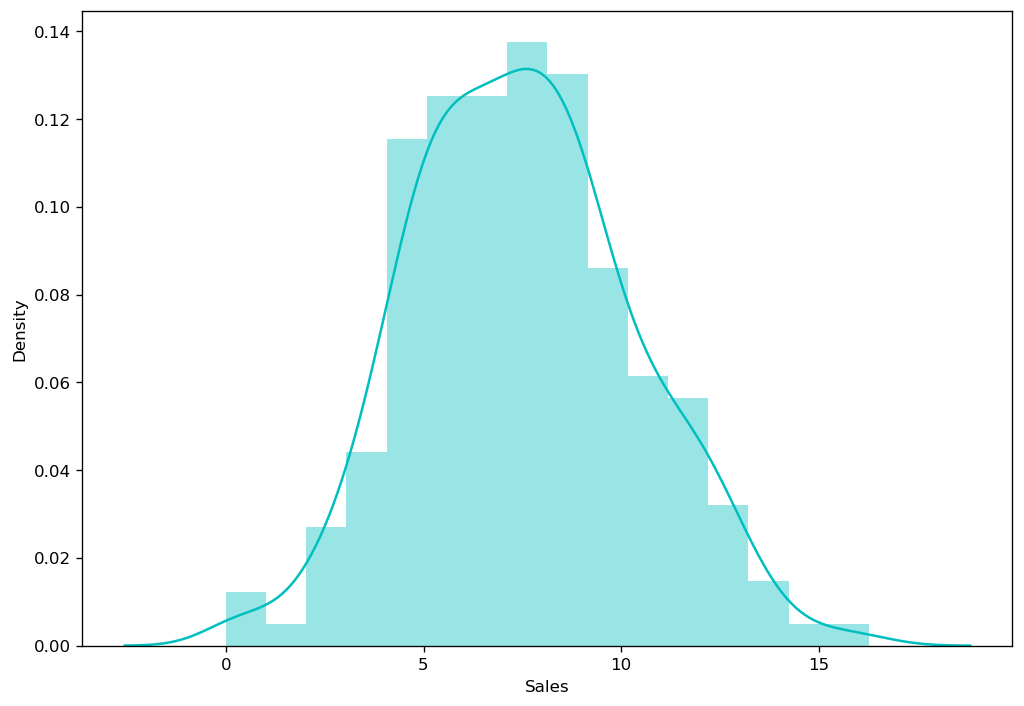

In [5]:
plt.rcParams['figure.figsize'] = (10,7)
plt.rcParams['figure.dpi'] = (120)

ax = sns.distplot(df['Sales'], kde = True, color='c')

In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

cols = ['ShelveLoc','Urban','US']
df[cols] = df[cols].apply(le.fit_transform)
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


<AxesSubplot:>

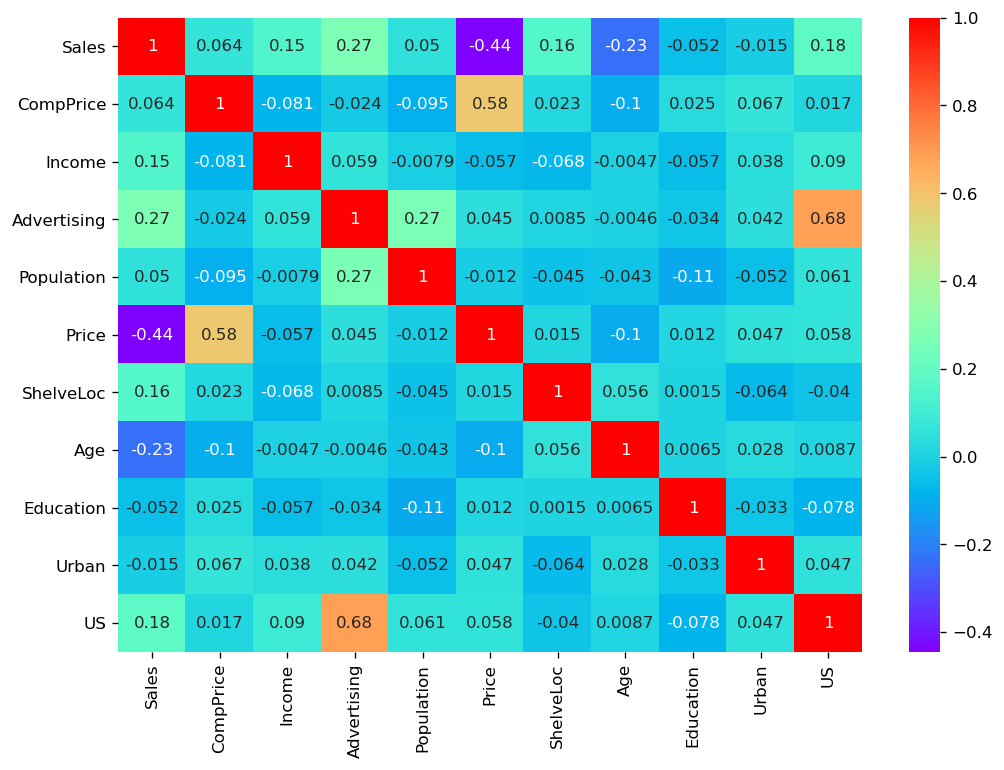

In [7]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='rainbow',cbar = True)

In [8]:
def split(i):
    if i < 5:
        return 'Low Sale'
    if i >5 and i < 10:
        return 'Medium Sale'
    else:
        return 'High Sale'

In [9]:
df['Sales'] = df['Sales'].apply(split)

In [10]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Medium Sale,138,73,11,276,120,0,42,17,1,1
1,High Sale,111,48,16,260,83,1,65,10,1,1
2,High Sale,113,35,10,269,80,2,59,12,1,1
3,Medium Sale,117,100,4,466,97,2,55,14,1,1
4,Low Sale,141,64,3,340,128,0,38,13,1,0


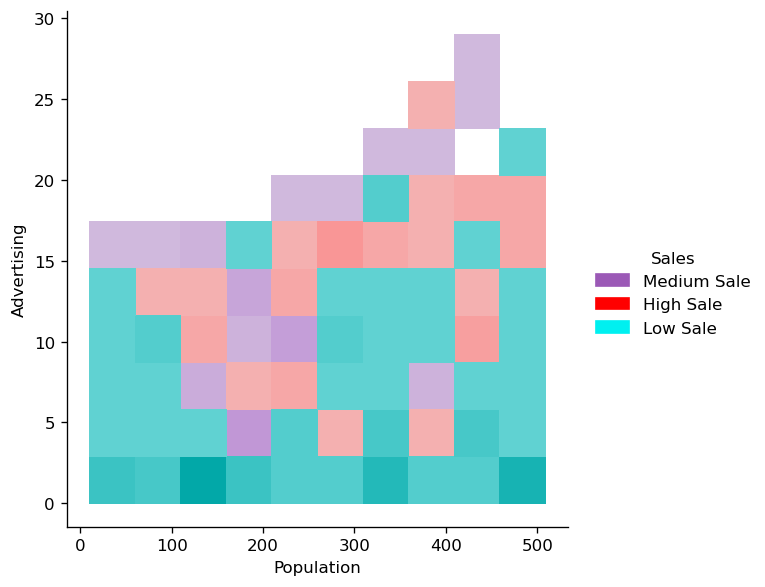

In [11]:
sns.displot(df, x = 'Population',y='Advertising',hue = 'Sales',palette=["#9b59b6", "#ff0000", "#00f0f0"], alpha=1)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales', ylabel='count'>

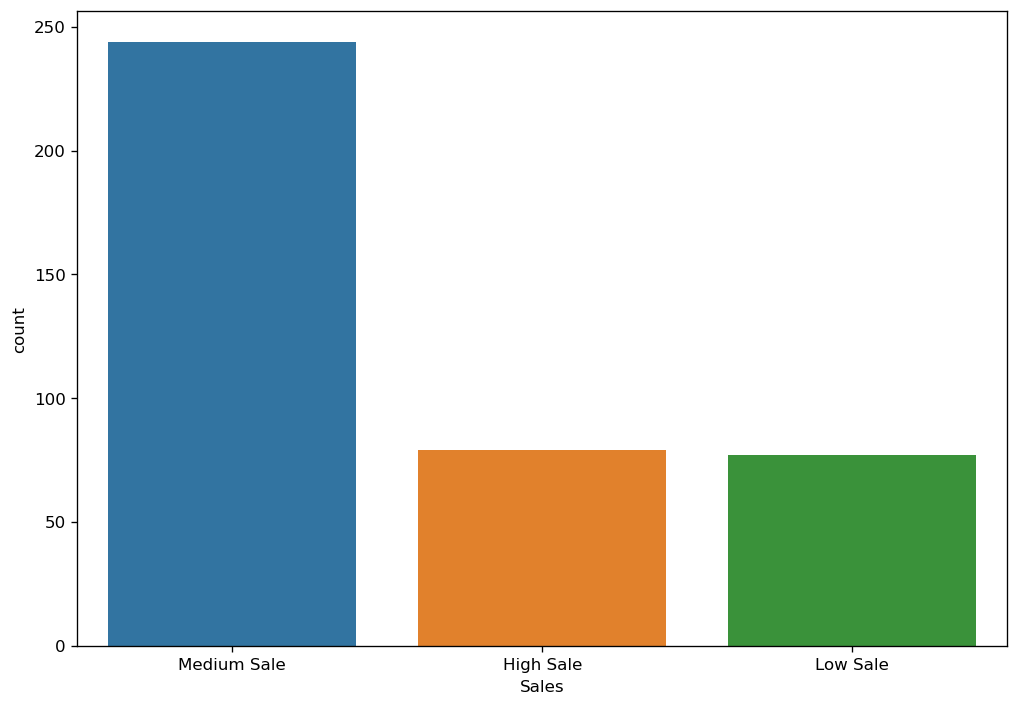

In [12]:
sns.countplot(df['Sales'])

<AxesSubplot:xlabel='Urban', ylabel='Age'>

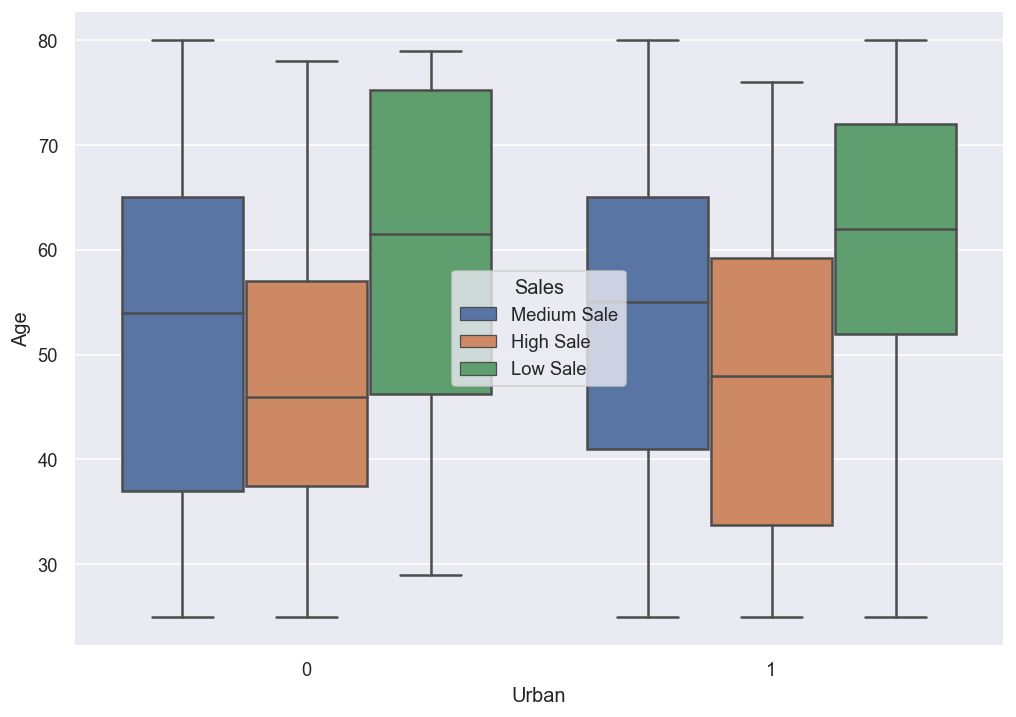

In [13]:
sns.set(style="darkgrid")
sns.boxplot(x ='Urban',y='Age',hue = 'Sales', data = df)

In [40]:
x = df.iloc[:,1:11]
y = df['Sales']

In [41]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 10)

**HYPERPARAMETER TUNING**

In [42]:
params = {
    'criterion' : ["gini", "entropy"],
    'splitter' : ["best", "random"],
    'max_depth': [1,2,3,4,5,6],
    'max_features' : ["auto", "sqrt", "log2"],
}

In [43]:
dt = DecisionTreeClassifier()
gridsearch = GridSearchCV(estimator=dt, param_grid=params, cv = 5)
gridsearch.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [45]:
gridsearch.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='log2',
                       splitter='random')

In [46]:
dt_model = DecisionTreeClassifier(criterion='entropy',max_features='log2', splitter='random')
dt_model.fit(x_train,y_train)
dt_pred = dt_model.predict(x_test)

In [47]:
print('The accuracy score is: ',accuracy_score(y_test,dt_pred))
print('-------------------------------------------------------------------------------')
print('Classification report : ', classification_report(y_test,dt_pred))
print('-------------------------------------------------------------------------------')
print('Confusion Matrix : ', confusion_matrix(y_test,dt_pred))


The accuracy score is:  0.6625
-------------------------------------------------------------------------------
Classification report :                precision    recall  f1-score   support

   High Sale       0.89      0.44      0.59        18
    Low Sale       0.33      0.23      0.27        13
 Medium Sale       0.68      0.86      0.76        49

    accuracy                           0.66        80
   macro avg       0.63      0.51      0.54        80
weighted avg       0.67      0.66      0.64        80

-------------------------------------------------------------------------------
Confusion Matrix :  [[ 8  0 10]
 [ 0  3 10]
 [ 1  6 42]]


In [48]:
dt_model.feature_importances_

array([0.08904923, 0.08824355, 0.07933228, 0.08453881, 0.20778617,
       0.20236041, 0.11836201, 0.06183244, 0.01870826, 0.04978685])

In [49]:
feature_imp = pd.DataFrame({'feature': list(x.columns),
                   'importance': dt_model.feature_importances_}).\
                    sort_values('importance', ascending = False)
feature_imp

,feature,importance
4,Price,0.207786
5,ShelveLoc,0.202360
6,Age,0.118362
0,CompPrice,0.089049
1,Income,0.088244
3,Population,0.084539
2,Advertising,0.079332
7,Education,0.061832
9,US,0.049787
8,Urban,0.018708


**PRICE IS THE MOST IMPORTANT FEATURE**